We will be using the MNIST fashion data set 

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
from matplotlib import pyplot as plt

Loading the data sets from keras and splitting into test and train data sets

In [3]:
fashion_mnist = keras.datasets.fashion_mnist     #load dataset


(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()   #splitting data set into test and train splits

In [4]:
print(train_images.shape)

print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


There are 60000 data in train set and 10000 in the test set of the data

In [5]:
train_images[0,23,23]      #checking the value of a pixel at index 0 and position (23,23)

194

Our data set conatins greyscale images whose pixel value range from 0 to 255

In [6]:
train_labels[:10]


array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [7]:
class_names =['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
#Check out what the images look like using pyplot from matplotlib

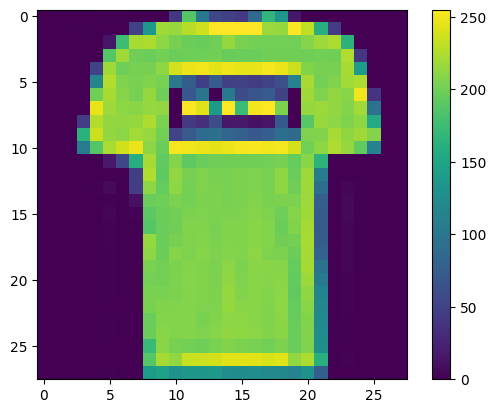

In [9]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

#Data preprocessing
we will be diving the test and train data by 255 so as to keep the data in the range of 0 to 1 so it will be easier to compute smaller values in the processed

In [10]:
train_images = train_images/255.0
test_images = test_images/255.0
train_images.shape

(60000, 28, 28)

#Building the model
the model will be built using the keras Sequential model with three different layers .This model represents a feed-forward neural network (one that passes values from left to right).

In [11]:
model = keras.Sequential([
                  keras.layers.Flatten(input_shape=(28,28)),         #input layer (1)
                  keras.layers.Dense(128,activation = "relu"),       #hidden layer (2)
                  keras.layers.Dense(10,activation="softmax")        #output layer (3)
])

Layer 1: This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

Layer 2: This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

Layer 3: This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function softmax is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

#Compiling the model
It is the last step in building model , that includes the works like defining the loss function , optimizers(working on gradient descent and back propagation) and the metrics we want to track

In [12]:
model.compile(optimizer="adam",
               loss= "sparse_categorical_crossentropy",
               metrics=["accuracy"])

#Training the model
Now we train or fit the model to the given training data 

In [13]:
model.fit(train_images,train_labels,epochs=10)     #passing the train data , label and the number of epochs

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4944 - accuracy: 0.8265
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3748 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3378 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3146 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2810 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2678 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2558 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2453 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

Now we evaluate the model

In [14]:
test_loss, test_acc = model.evaluate(test_images,test_labels , verbose=1)        #verbose =1 gives the progress bar

313/313 [==============================] - 1s 1ms/step - loss: 0.3464 - accuracy: 0.8823


In [15]:
print("Test accuracy : ", test_acc)

Test accuracy :  0.8823000192642212


#Making predictions

Now we make predictions on the test data by using the .predict() method and passing test_images to it

In [16]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [17]:
predictions[0]        #predictions for the first image

array([4.1141125e-06, 5.0830316e-08, 3.4583657e-06, 6.4165218e-10,
       2.5478670e-07, 3.0155411e-02, 1.1408451e-04, 8.4810536e-03,
       4.4276597e-08, 9.6124154e-01], dtype=float32)

To find out the actual index of the class which it has predicted. 
We use the np.argmax() function 

In [18]:
np.argmax(predictions[0])     

9

In [19]:
test_labels[0]      #checking for the actual value to check if prediction matched or not

9

#Verifying predictions
We will be veryfying our predictions with the actual labels with a visual output showing the acutal item

In [20]:
COLOR="white"
plt.rcParams['text.color']=COLOR
plt.rcParams['axes.labelcolor'] =COLOR

def predict(model, image, correct_label):
  class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  prediction_class = class_names[np.argmax(prediction)]
  

  show_image(image, class_names[correct_label],prediction_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()
  print("Excpected: " + label)
  print("Guess: " + guess)

def get_number():
  while True:
    num = input("Enter a number : ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")



Enter a number : 655
1/1 [==============================] - 0s 19ms/step


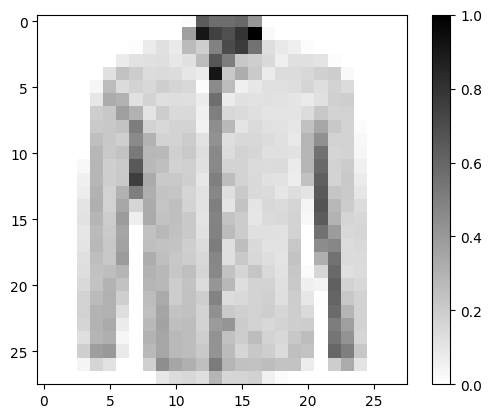

Excpected: Shirt
Guess: Shirt


In [21]:
num = get_number()
test_image= test_images[num]
test_label = test_labels[num]

predict(model,test_image,test_label)